In [340]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals
import matplotlib.pyplot as plt
from time import time
import sys
from abel.direct import direct_transform
from abel.tools.analytical import GaussianAnalytical
from xbeamfit import fitting
from xbeamfit import distributions 
import json
import numpy as np
import scipy as sp
import pandas as pd
import sys
import xbeamfit as xb 
from scipy import interpolate
from numpy import trapz
import scipy.integrate as integrate
from scipy import special
from scipy.stats import norm

from scipy.stats import chi
from scipy.stats import chi2
from xsuite_functions import footprint as fp


In [343]:
x_input = np.linspace(-20,20,20000)

q0 = 1

b0 =  1/(5-3*q0)
#sigma = 1/((b0)*(5-3*q0))
A0 = 1

pq = xb.distributions.qGauss(x_input, mu=0, A=A0, b=b0, q=q0)/np.sum(xb.distributions.qGauss(x_input, mu=0, A=A0, b=b0, q=q0))
pq = np.nan_to_num(pq)

qxg = np.random.choice(a=x_input,p=pq,size=10000)
qpxg = np.random.choice(a=x_input,p=pq,size=10000)



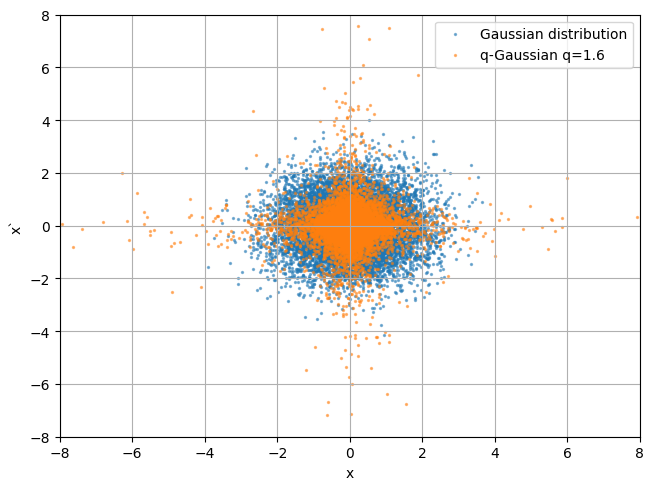

In [352]:
# un matched 
x_input = np.linspace(-20,20,20000)

q0 = 1.6


b0 =  1/(5-3*q0)
#sigma = 1/((b0)*(5-3*q0))
A0 = 1

pq = xb.distributions.qGauss(x_input, mu=0, A=A0, b=b0, q=q0)/np.sum(xb.distributions.qGauss(x_input, mu=0, A=A0, b=b0, q=q0))
pq = np.nan_to_num(pq)

qx6 = np.random.choice(a=x_input,p=pq,size=10000)
qpx6 = np.random.choice(a=x_input,p=pq,size=10000)


# un matched 
x_input = np.linspace(-20,20,20000)

q0 = 1.6

b0 =  1/(5-3*q0)
#sigma = 1/((b0)*(5-3*q0))
A0 = 1

pq = xb.distributions.qGauss(x_input, mu=0, A=A0, b=b0, q=q0)/np.sum(xb.distributions.qGauss(x_input, mu=0, A=A0, b=b0, q=q0))
pq = np.nan_to_num(pq)

qx6 = np.random.choice(a=x_input,p=pq,size=10000, ), 
qpx6 = np.random.choice(a=x_input,p=pq,size=10000, )


plt.figure()
plt.scatter(qxg,qpxg, alpha=0.5, s=2, label='Gaussian distribution')
plt.scatter(qx6,qpx6, alpha=0.5, s=2, label='q-Gaussian q=1.6')


plt.grid()
plt.tight_layout()
plt.xlabel('x')
plt.ylabel('x`')
plt.xlim([-8,8])
plt.ylim([-8, 8])
plt.legend()
plt.savefig('presentation_plots/misamtch_qgauss.png', dpi=400)

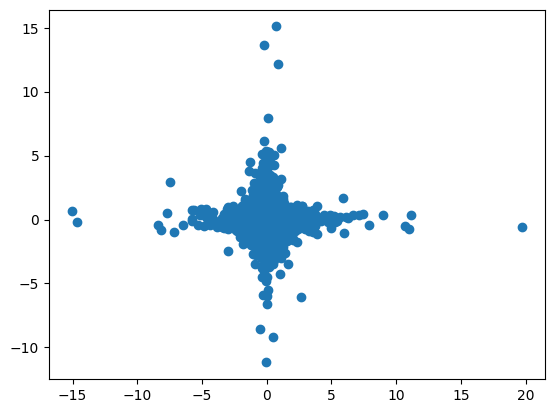

In [310]:
# un matched 
x_input = np.linspace(-20,20,20000)

q0 = 1.6

b0 =  1/(5-3*q0)
#sigma = 1/((b0)*(5-3*q0))
A0 = 1

pq = xb.distributions.qGauss(x_input, mu=0, A=A0, b=b0, q=q0)/np.sum(xb.distributions.qGauss(x_input, mu=0, A=A0, b=b0, q=q0))
pq = np.nan_to_num(pq)

qx6 = np.random.choice(a=x_input,p=pq,size=10000)
qpx6 = np.random.choice(a=x_input,p=pq,size=10000)

plt.scatter(qx6,qpx6)


### now lets try to match a q-Gaussian distribution

In [336]:
# find r from an abel transform of a q-gauss

x = np.linspace(-100,100,20000)

q0=1.3
b0=1


qgauss = xb.distributions.qGauss(x,mu=0,q=q0,A=1,b=b0)
qgauss = np.nan_to_num(qgauss, 0)


############ Inverse Abel transform 

r = np.linspace(0.00001,100.00001,10000)
abel_qgauss = direct_transform(qgauss[10000:], dr=np.diff(r)[0], direction="Inverse", correction=True)

#abel_qgauss*2*np.pi*r

to_forward_transform = abel_qgauss
abel_inverse = direct_transform(to_forward_transform, dr=np.diff(x)[0], direction="Forward", correction=True)



Falling back to a pure Python backend...
Falling back to a pure Python backend...


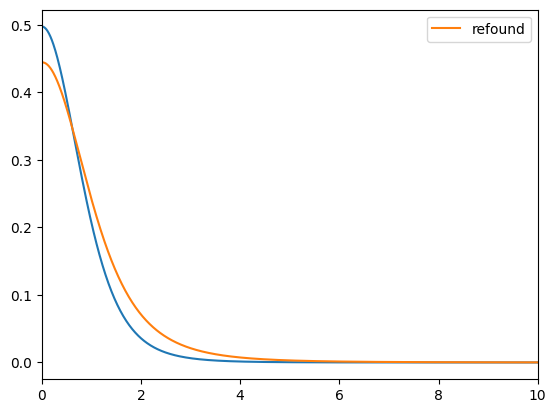

In [337]:
plt.plot(x,qgauss)
plt.plot(x[10000:], abel_inverse/(5.0), label='refound')
plt.xlim([0,10])
plt.legend()

In [213]:
norm_coordinates = fp.generate_coordGrid(r,
                                    np.linspace(0.0*2*np.pi,1*2*np.pi,1000),labels = ['r_n','theta_n'])
norm_coordinates.insert(0,'x_n',norm_coordinates['r_n']*np.cos(norm_coordinates['theta_n']))
norm_coordinates.insert(1,'y_n',norm_coordinates['r_n']*np.sin(norm_coordinates['theta_n']))
norm_coordinates.insert(2,'dens', 0)

df_coords =  norm_coordinates[['theta_n','r_n','dens']].copy()
df_coords = df_coords.pivot('theta_n','r_n','dens' )

for i in range(1000):
    col = df_coords.keys()[i]
    df_coords.loc[:,col] = abel_qgauss 

/tmp/ipykernel_1892048/1029669987.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_coords = df_coords.pivot('theta_n','r_n','dens' )


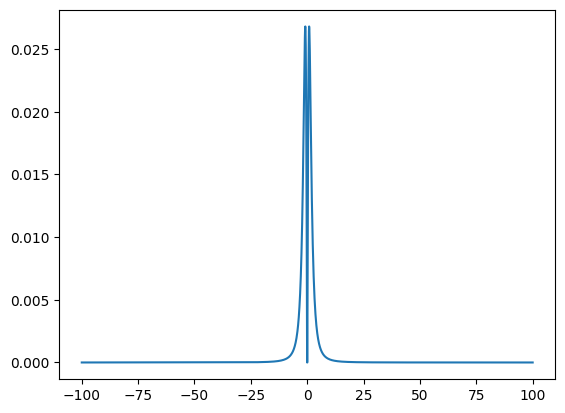

In [253]:
abel_qgauss = 2*np.pi*r*abel_qgauss
abel_transform= np.concatenate([abel_qgauss[::-1], abel_qgauss])
plt.plot(x,abel_transform)

In [256]:
transform_back = direct_transform(abel_qgauss, dr=np.diff(x)[0], direction="Forward", correction=True)


Falling back to a pure Python backend...


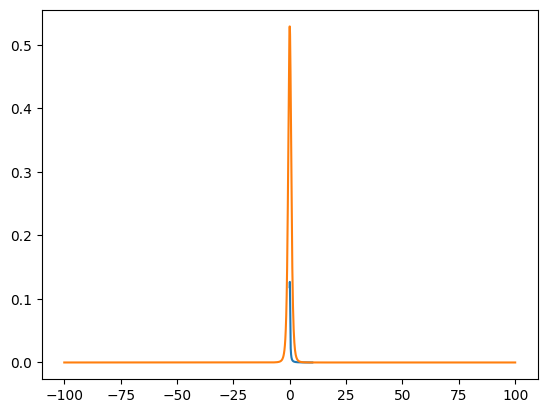

In [258]:
plt.plot(r,transform_back,)
plt.plot(x,qgauss)

In [195]:
transform_r = []
for i in range(1000):
    transform_r.append(transform_back[i][1])
transform_r = np.array(transform_r)

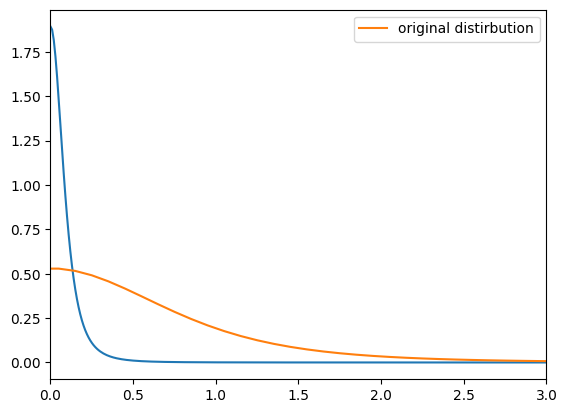

In [196]:
plt.plot(r,transform_r)
plt.xlim([0,3])
plt.plot(x,qgauss, label='original distirbution')
plt.legend()


/tmp/ipykernel_1892048/3160090888.py:7: RuntimeWarning: divide by zero encountered in log
  pcm=ax.pcolormesh(theta, r, np.log(data),cmap='jet', )
/tmp/ipykernel_1892048/3160090888.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  pcm=ax.pcolormesh(theta, r, np.log(data),cmap='jet', )


Text(0.5, 1.0, 'q-Gaussian profile in x, transformed to density in x-px with the Abel transform')

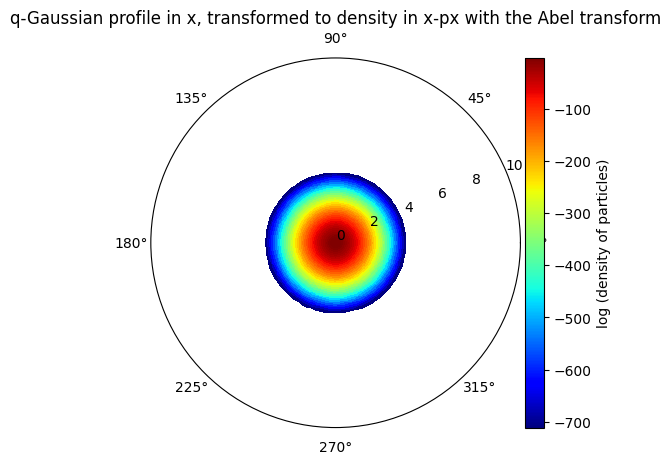

In [119]:
theta = df_coords.columns.values
r = df_coords.index.values
data =  df_coords.values

fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
pcm=ax.pcolormesh(theta, r, np.log(data),cmap='jet', )
cbar=plt.colorbar(pcm,pad=0.01, label='log (density of particles)')
ax.set_title('q-Gaussian profile in x, transformed to density in x-px with the Abel transform')




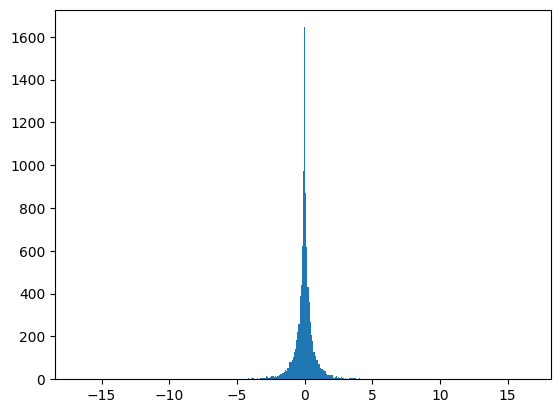

In [266]:
# the PDF that one is one or the other
plt.hist(qx1*qpx1, bins=400);

# that is the distribution that we are assuming - now to go back to the forward transform of it ... 



In [197]:
# now abel transform back and see what you get, a dimensional 2d array- or transform back to x and x' ? 

# rcos(theta) = x
# -rsin(theta) = y

# transform back the data to x, x' and plot x, x' 

def unpivot(frame):
    N, K = frame.shape
    data = {
        "density": frame.to_numpy().ravel("F"),
        "theta_n": np.asarray(frame.columns).repeat(N),
        "r_n": np.tile(np.asarray(frame.index), K),
    }
    return pd.DataFrame(data, columns=["r_n", "theta_n", "density"])


In [198]:
new = unpivot(df_coords)

In [199]:
new.insert(0,'x_n',new['r_n']*np.cos(new['theta_n']))
new.insert(1,'y_n',new['r_n']*np.sin(new['theta_n']))

In [200]:
new

,x_n,y_n,r_n,theta_n,density
0,0.000000,0.000000,0.000000,0.0,9.462802e-02
1,0.006289,0.000000,0.006289,0.0,9.372212e-02
2,0.012579,0.000000,0.012579,0.0,9.078844e-02
3,0.018868,0.000000,0.018868,0.0,8.622207e-02
4,0.025158,0.000000,0.025158,0.0,8.044487e-02
...,...,...,...,...,...
999995,-5.250933,-3.404499,6.258027,10.0,5.480552e-10
999996,-5.256210,-3.407921,6.264317,10.0,4.734055e-10
999997,-5.261487,-3.411342,6.270606,10.0,3.852333e-10
999998,-5.266765,-3.414764,6.276896,10.0,3.027074e-10


In [148]:
data = {'x_n':np.array(new['x_n']),
        'y_n': np.array(new['y_n']), 
       'density': np.array(new['density'])}

df = pd.DataFrame(data)